In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_location = './data/data.csv'

In [4]:
data_df = pd.read_csv(data_location)
%store data_df

Stored 'data_df' (DataFrame)


In [5]:
%store -r data_df

In [6]:
#Convert the topics into a list
data_df["Topic"] = data_df["Topic"].apply(eval)

In [7]:
#Convert lists into Pandas series so they can be analized
def list_to_series(series):
 return pd.Series([x for _list in series for x in _list])

In [8]:
topic_counts = list_to_series(data_df["Topic"]).value_counts()
topic_counts.to_excel('./data/topic-counts.xlsx')

Text(0.5, 1.0, 'Topic Frequency')

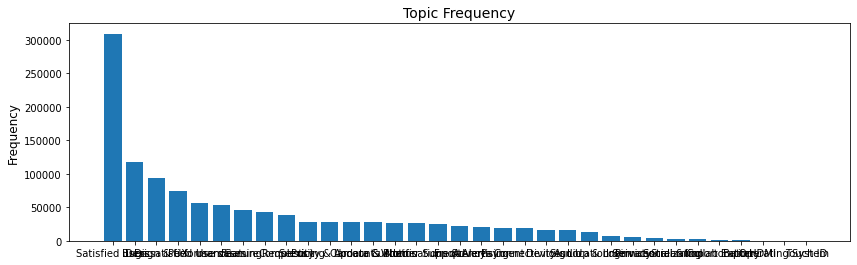

In [26]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(list_to_series(data_df["Topic"]).value_counts().index,
        list_to_series(data_df["Topic"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Topic Frequency", size = 14)